In [1]:
# importing the necessary libraries or packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
os.chdir(r'E:/Final_Project/Model/RGT_training')

In [3]:
cars_data = pd.read_csv("CarPrice.csv")
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars_data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [6]:
cars_data.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [7]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
cars_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
print(cars_data['symboling'].value_counts())
print(cars_data['drivewheel'].value_counts())
print(cars_data['fueltype'].value_counts())
print(cars_data['aspiration'].value_counts())
print(cars_data['price'].value_counts())

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
price
8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: count, Length: 189, dtype: int64


In [10]:
symboling = cars_data['symboling']
fuel_type = cars_data['fueltype']
drivewheel = cars_data['drivewheel']
aspiration = cars_data['aspiration']
price = cars_data['price']

In [11]:
from matplotlib import style

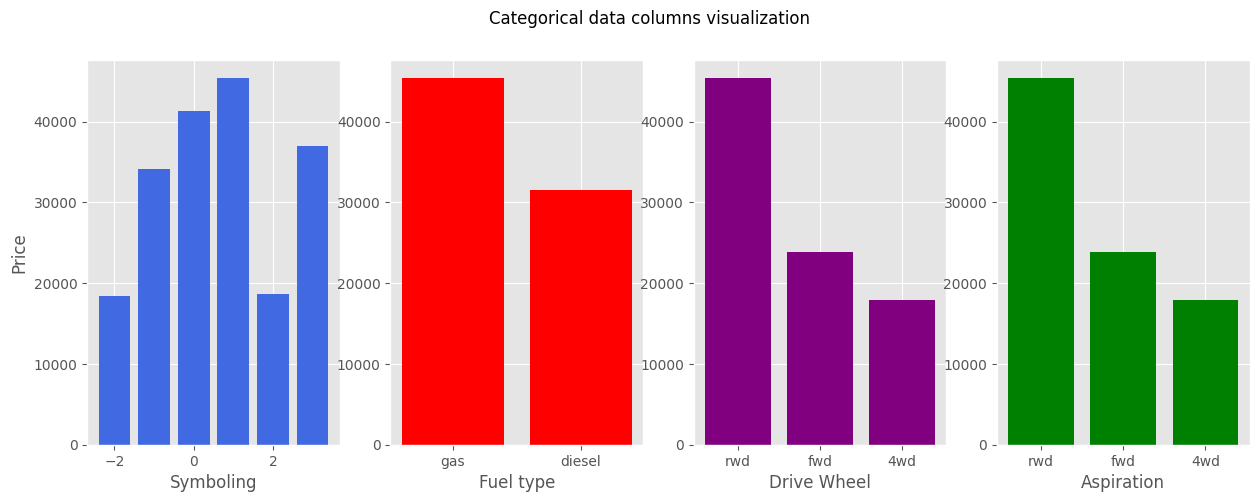

In [12]:
style.use('ggplot')
fig = plt.figure(figsize=(15, 5))
fig.suptitle('Categorical data columns visualization')
plt.subplot(1, 4, 1)
plt.bar(symboling, price, color='royalblue')
plt.xlabel("Symboling")
plt.ylabel("Price")
plt.subplot(1, 4, 2)
plt.bar(fuel_type, price, color='red')
plt.xlabel("Fuel type")
plt.subplot(1, 4, 3)
plt.bar(drivewheel, price, color='purple')
plt.xlabel("Drive Wheel")
plt.subplot(1, 4, 4)
plt.bar(drivewheel, price, color='green')
plt.xlabel("Aspiration")
plt.show()

<Axes: xlabel='aspiration', ylabel='price'>

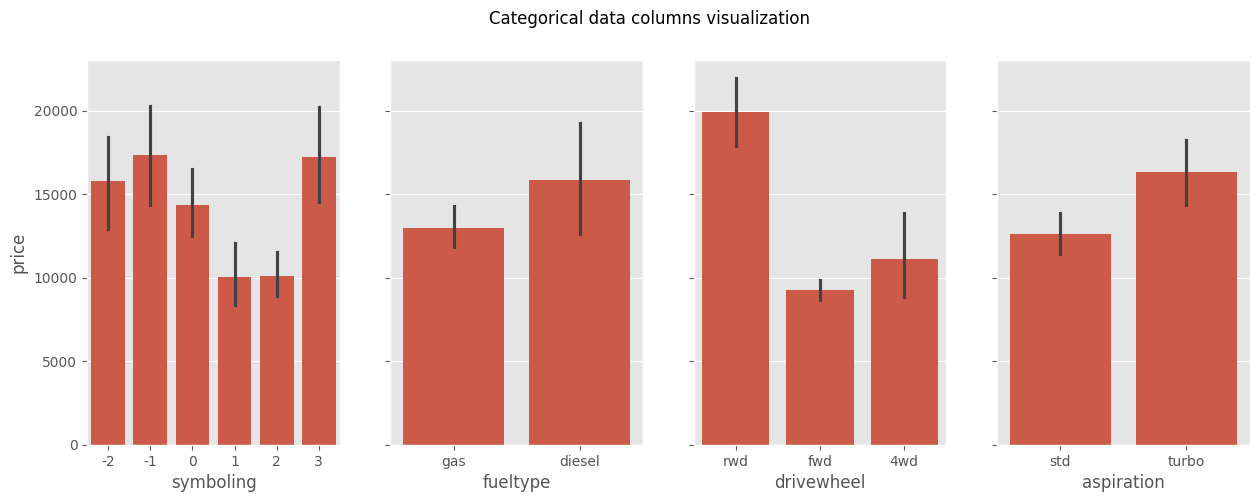

In [13]:
fig, axes = plt.subplots(1,4,figsize=(15,5), sharey=True)
fig.suptitle('Categorical data columns visualization')
sns.barplot(x=symboling, y=price, ax=axes[0])
sns.barplot(x=fuel_type, y=price, ax=axes[1])
sns.barplot(x=drivewheel, y=price, ax=axes[2])
sns.barplot(x=aspiration, y=price, ax=axes[3])

In [14]:
fuel_data = cars_data.groupby('fueltype').get_group('diesel')
fuel_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,125.600000,0.100000,104.390000,182.010000,67.430000,55.835000,2898.800000,135.700000,3.374500,3.485500,22.005000,84.450000,4435.000000,30.300000,34.750000,15838.150000
std,50.261841,0.967906,6.869452,11.465596,2.251339,1.641333,585.386026,32.115089,0.285334,0.109134,0.802939,25.958418,239.571987,6.610199,8.626001,7759.843713
min,64.000000,-1.000000,94.500000,165.300000,63.800000,52.800000,2017.000000,97.000000,2.990000,3.350000,21.000000,52.000000,4150.000000,22.000000,25.000000,7099.000000
25%,70.750000,-0.250000,97.300000,171.700000,65.500000,54.900000,2308.000000,108.250000,3.010000,3.400000,21.375000,62.000000,4187.500000,25.000000,25.000000,9120.000000
50%,114.000000,0.000000,105.800000,183.450000,67.650000,55.700000,2948.500000,139.500000,3.410000,3.495000,21.950000,84.000000,4425.000000,29.000000,33.000000,13852.500000
75%,177.000000,0.000000,109.325000,189.325000,68.525000,56.700000,3443.750000,152.000000,3.610000,3.550000,22.775000,97.750000,4537.500000,36.250000,42.000000,19375.500000
max,204.000000,2.000000,115.600000,202.600000,71.700000,58.700000,3770.000000,183.000000,3.700000,3.640000,23.000000,123.000000,4800.000000,45.000000,50.000000,31600.000000


In [15]:
columns_to_drop = ['wheelbase', 'compressionratio', 'doornumber', 'carbody', 'enginelocation', 'enginetype', 'cylindernumber', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke','horsepower','peakrpm', 'citympg', 'highwaympg']

In [16]:
# Drop the specified columns
cars_data.drop(columns=columns_to_drop, inplace=True)


In [17]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,drivewheel,fuelsystem,price
0,1,3,alfa-romero giulia,gas,std,rwd,mpfi,13495.0
1,2,3,alfa-romero stelvio,gas,std,rwd,mpfi,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,rwd,mpfi,16500.0
3,4,2,audi 100 ls,gas,std,fwd,mpfi,13950.0
4,5,2,audi 100ls,gas,std,4wd,mpfi,17450.0


In [18]:
# manual encoding
cars_data.replace({'fueltype':{'gas':0, 'diesel':1}}, inplace=True)
cars_data.replace({'aspiration':{'std':0, 'turbo':1}}, inplace=True)
cars_data.replace({'drivewheel':{'rwd':0, 'fwd':1, '4wd':2}}, inplace=True)
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,drivewheel,fuelsystem,price
0,1,3,alfa-romero giulia,0,0,0,mpfi,13495.0
1,2,3,alfa-romero stelvio,0,0,0,mpfi,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,0,mpfi,16500.0
3,4,2,audi 100 ls,0,0,1,mpfi,13950.0
4,5,2,audi 100ls,0,0,2,mpfi,17450.0


In [19]:
# one hot encoding
cars_data = pd.get_dummies(cars_data, columns=['fuelsystem'], drop_first=True)
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,drivewheel,price,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,0,0,0,13495.0,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,0,0,0,16500.0,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,0,0,0,16500.0,False,False,False,False,True,False,False
3,4,2,audi 100 ls,0,0,1,13950.0,False,False,False,False,True,False,False
4,5,2,audi 100ls,0,0,2,17450.0,False,False,False,False,True,False,False


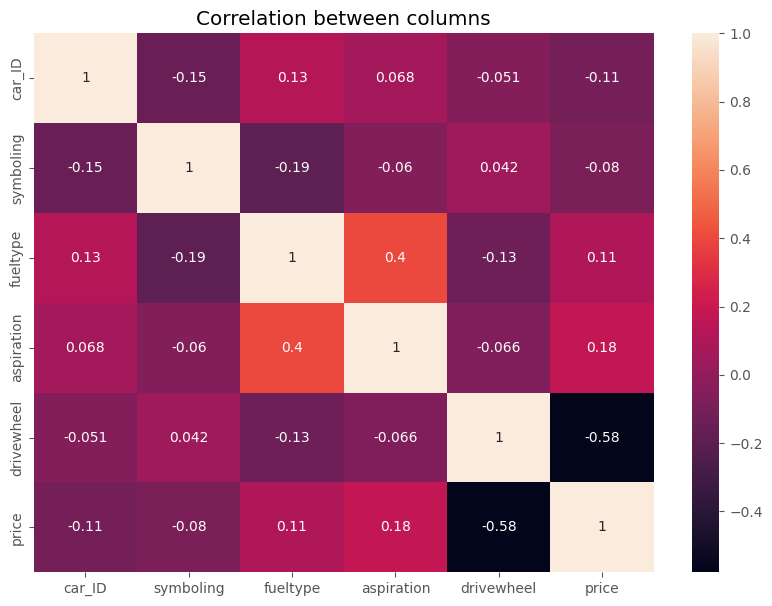

In [20]:
non_numeric_columns = ['CarName']

# Filter out non-numeric columns
numeric_data = cars_data.select_dtypes(include=['number'])

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation between columns')
plt.show()

# Lighter color -> higher correlation value
# Darker color -> lower correlation value

<Axes: title={'center': 'Correlation between aspiration and fueltype'}, xlabel='aspiration', ylabel='fueltype'>

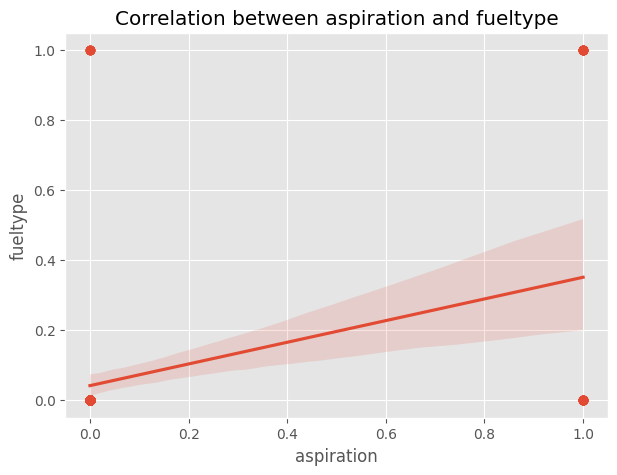

In [21]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between aspiration and fueltype')
sns.regplot(x='aspiration', y='fueltype', data=cars_data)

In [22]:
x = cars_data.drop(['CarName', 'drivewheel', 'price'], axis=1)
y = cars_data['price']

In [23]:
print("Shape of x is: ", x.shape)
print("Shape of y is: ", y.shape)

Shape of x is:  (205, 11)
Shape of y is:  (205,)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
# training set = 70%
# testing set = 30% 

In [25]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (143, 11)
x_test shape:  (62, 11)
y_train shape:  (143,)
y_test shape:  (62,)


In [26]:
scaler = StandardScaler()

In [27]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [28]:
model = LinearRegression()

In [29]:
model.fit(x_train, y_train)

LinearRegression()

In [30]:
pred = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Calculate and print metrics
mae = metrics.mean_absolute_error(pred, y_test)
mse = metrics.mean_squared_error(pred, y_test)
r2 = metrics.r2_score(pred, y_test)

print("MAE:", mae)
print("MSE:", mse)
print("R2 score:", r2)

MAE: 4546.390915636935
MSE: 40183665.62209842
R2 score: -0.43206066551224165


In [33]:
# Calculate and print accuracy
accuracy = 1 - mae/np.mean(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6495426471487507


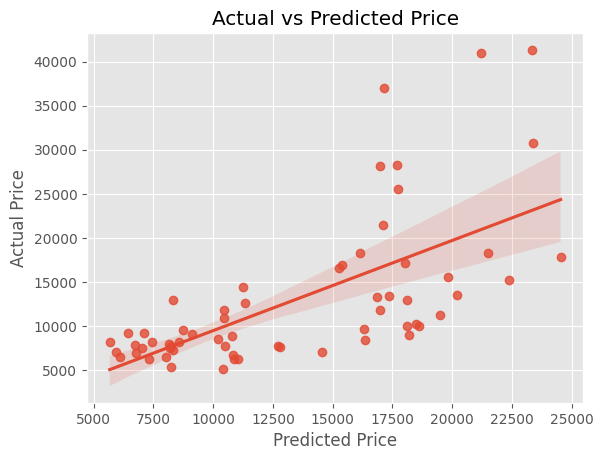

In [34]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs Predicted Price")
plt.show()